In [33]:
import re
import emoji
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('../Dataset/headlines-dataset/raw/headlines-raw-data.csv')

In [35]:
df.head()

,label,text
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


In [36]:
df.shape

(28619, 2)

In [37]:
df.isna().sum()

label    0
text     0
dtype: int64

In [38]:
df.duplicated().sum()

116

In [39]:
df = df.drop_duplicates()

In [40]:
df.isna().sum()

label    0
text     0
dtype: int64

In [41]:
df.shape

(28503, 2)

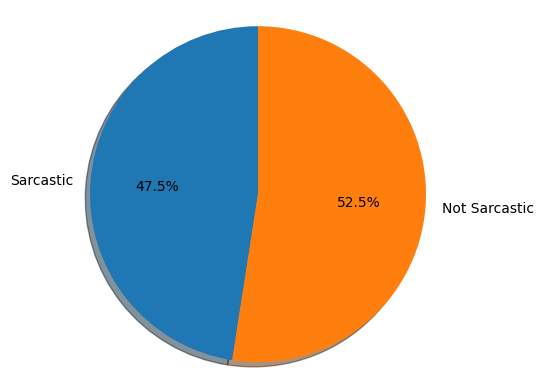

In [43]:
labels = 'Sarcastic', 'Not Sarcastic'
sizes = [df['label'].value_counts()[1], df['label'].value_counts()[0]]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

In [44]:
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

df['text'] = df['text'].apply(remove_punctuation)

In [45]:
def clean_data(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove emojis
    text = emoji.demojize(text)
    text = re.sub(r':[a-z_]+:', '', text)

    # Replace @{username} with 'user'
    text = re.sub(r'@[\w]+', 'user', text)
    
    # Remove numbers from text
    text = re.sub(r'\d+', '', text)
    
    # Remove hastags
    text = re.sub(r'#', '', text)

    return text

df['text'] = df['text'].apply(clean_data)

In [46]:
df.head()

,label,text
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep totally nails why congress is falling ...
2,0,eat your veggies deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word stream...


In [47]:
df.replace('', np.nan).isna().all(axis=1).sum()

0

In [32]:
df = df.sample(frac=1).reset_index(drop=True)

split_index = int(0.8 * df.shape[0])

df_train = df[:split_index]
df_test = df[split_index:]

df_train.to_csv("../Dataset/headlines-dataset/preprocessed/train.csv", index=False)
df_test.to_csv("../Dataset/headlines-dataset/preprocessed/test.csv", index=False)